<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Banana-Single.jpg/680px-Banana-Single.jpg" width="200">

<img src="https://hips.hearstapps.com/hmg-prod/images/red-fresh-apple-isolated-on-white-background-royalty-free-image-1627314996.jpg" width="200px">   # html code for picture

- banana width ≈ 4cm
- banana length ≈ 8cm
- apple width ≈ 6cm
- apple length ≈ 6cm

assume:

apple: 0

banana: 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
def generate_dataset(n):
    apple_width = np.random.normal(6, 1, n)
    apple_length = np.random.normal(6, 1, n)
    banana_width = np.random.normal(4, 1, n)
    banana_length = np.random.normal(8, 1, n)

    width = np.concatenate((apple_width, banana_width))
    length = np.concatenate((apple_length, banana_length))
    X = np.array([width, length]).T   # replace rows and colums

    Y_apple = np.zeros(n, dtype='int')
    Y_banana = np.ones(n, dtype='int')
    Y = np.concatenate((Y_apple, Y_banana)) # Y for distinguish the fruit 

    return X, Y

In [3]:
X_train, Y_train = generate_dataset(100)

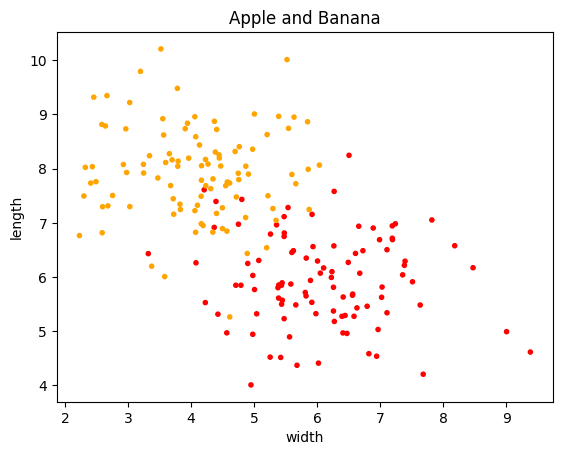

In [4]:
cmap = ['red', 'orange']
plt.scatter(X_train[ : , 0], X_train[ : , 1], c= Y_train, cmap=matplotlib.colors.ListedColormap(cmap), marker='.')
plt.title('Apple and Banana')
plt.xlabel('width')
plt.ylabel('length')
plt.show()

In [17]:
from knn import KNN

In [18]:
knn = KNN(K=5)
knn.fit(X_train, Y_train)

In [19]:
new_fruit = np.array([3, 8.4])
new_fruit_2 = np.array([6, 6])
new_fruit_3 = np.array([4, 7])
new_fruits = [new_fruit, new_fruit_2, new_fruit_3]
outputs = knn.predict(new_fruits)



In [20]:
for output in outputs:
    if output == 0:
        print('🍎')
    else:
        print('🍌')

🍌
🍎
🍌


In [21]:
X_test, Y_test = generate_dataset(90)

In [22]:
knn.evaluate(X_test, Y_test)

0.9333333333333333

In [ ]:
Y_pred = knn.predict(X_test)
Y_pred

In [24]:
confusion_matrix = np.zeros((2,2))  # Y_test: actual , Y_pred: predict

for i in range(180):
    if Y_test[i] == 0 and Y_pred[i] ==0:
        confusion_matrix[0][0] += 1
    elif Y_test[i] == 0 and Y_pred[i] == 1:
        confusion_matrix[0][1] += 1
    elif Y_test[i] == 1 and Y_pred[i] == 0:
        confusion_matrix[1][0] += 1
    if Y_test[i] == 1 and Y_pred[i] == 1:
        confusion_matrix[1][1] += 1

confusion_matrix


array([[81.,  9.],
       [ 3., 87.]])

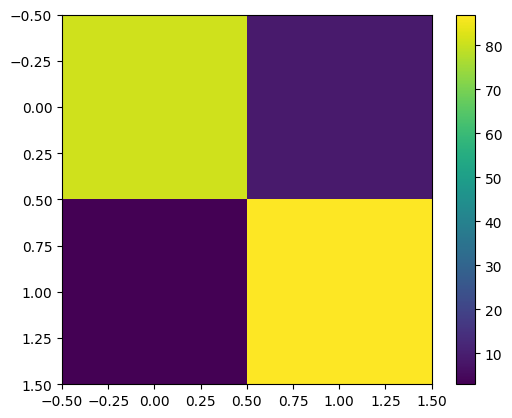

In [25]:
plt.imshow(confusion_matrix)
plt.colorbar()
plt.show()

scikit-learn is a library that do all we have done.
pip install scikil-learn
pip install -U scikit-learn for new version update
- import sklearn

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
knn.predict(new_fruits)

array([1, 0, 1])

In [27]:
knn.score(X_test, Y_test)   # score in sklearn same as our evaluate method

0.9333333333333333